# Anomaly Detection

The objective of this notebook is to create a reconstruction autoencoder AI model to detect ssh login intrusion.

In [250]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns

from keras.models import Model, Sequential
from keras.layers import Dense
from keras import Input, callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt

sns.set(font_scale=1.4)
sns.set_style("white")
sns.set_style("ticks")

The following data is extracted from the syslog of a Linux VM on Azure. "myazure1" is a valid user that has successfully logged into the VM several times. Other users are unsuccessfully tried by the bots on the internet. Although the data is labelled, the labels are used only to validate the efficacy of the model.

The definition of the data attributes are given below
- **login_success** - Whether the SSH login is successful (1) or not (0)
- **wrong_password** - Whether the SSH password was wrong (1) or correct (0)
- **invalid_user** - Whether the SSH user is invalid (1) or valid (0)
- **last_login_success** - Whether the given user's last login was successful (1) or not (0)
- **last_ip_login_failure** - Whether the source IP and user combination failed to login last time (1) or not (0)
- **anomaly** - Whether there  is anomaly (1) or not (0). All the users tried by the bots on the internet are marked as anomaly

In [251]:
PATH_TO_DATA = 'https://raw.githubusercontent.com/saptarshibasu/anomaly-detection/main/sample-data/sshlogin_3.csv'

data = pd.read_csv(PATH_TO_DATA, header = 0)

data.head(100)

,login_success,wrong_password,invalid_user,last_login_success,last_ip_login_failure,user,source_ip,source_port,anomaly
0,0,0,1,0,0,profile1,102.22.177.9,50290,1
1,0,0,1,0,1,profile1,102.22.177.9,56554,1
2,0,0,1,0,1,profile1,102.22.177.9,51287,1
3,0,0,1,0,1,profile1,102.22.177.9,65310,1
4,0,0,1,0,0,user1,102.22.177.9,65164,1
...,...,...,...,...,...,...,...,...,...
95,0,0,1,0,1,administrator,102.22.177.9,54649,1
96,0,0,1,0,1,administrator,102.22.177.9,58209,1
97,0,0,1,0,1,administrator,102.22.177.9,59447,1
98,0,0,1,0,1,administrator,102.22.177.9,61853,1


In [252]:
TARGET = 'anomaly'
USER = 'user'
SOURCE_IP = 'source_ip'
SOURCE_PORT = 'source_port'

features = data.drop([TARGET, USER, SOURCE_IP, SOURCE_PORT], axis=1) / 2
target = data[TARGET]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)

train_index = y_train[y_train == 0].index
train_data = x_train.loc[train_index]
target_data = y_train.loc[train_index]

features.head()

,login_success,wrong_password,invalid_user,last_login_success,last_ip_login_failure
0,0.0,0.0,0.5,0.0,0.0
1,0.0,0.0,0.5,0.0,0.5
2,0.0,0.0,0.5,0.0,0.5
3,0.0,0.0,0.5,0.0,0.5
4,0.0,0.0,0.5,0.0,0.0


In [253]:
model = Sequential(
[
    Input(shape = (train_data.shape[1],)),
    Dense(5, activation=tf.nn.relu),
    Dense(3, activation=tf.nn.relu),
    Dense(5, activation=tf.nn.sigmoid)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = model.fit(train_data, train_data, 
          epochs=500,
          batch_size=200,
          shuffle=True,
          validation_split=0.3,
          callbacks=[
              callbacks.EarlyStopping(monitor="val_loss", patience=5)
          ],
        )


Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.1327 - val_loss: 0.1315
Epoch 2/500
1/1 [==============================] - 0s 62ms/step - loss: 0.1322 - val_loss: 0.1311
Epoch 3/500
1/1 [==============================] - 0s 53ms/step - loss: 0.1318 - val_loss: 0.1307
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 0.131 - 0s 61ms/step - loss: 0.1314 - val_loss: 0.1303
Epoch 5/500
1/1 [==============================] - 0s 64ms/step - loss: 0.1310 - val_loss: 0.1299
Epoch 6/500
1/1 [==============================] - 0s 62ms/step - loss: 0.1306 - val_loss: 0.1294
Epoch 7/500
1/1 [==============================] - 0s 69ms/step - loss: 0.1302 - val_loss: 0.1290
Epoch 8/500
1/1 [==============================] - 0s 63ms/step - loss: 0.1297 - val_loss: 0.1285
Epoch 9/500
1/1 [==============================] - 0s 65ms/step - loss: 0.1293 - val_loss: 0.1281
Epoch 10/500
1/1 [==============================] - 0s 55ms/step - loss: 0.1288 - val_loss: 0.12

1/1 [==============================] - 0s 60ms/step - loss: 0.0930 - val_loss: 0.0914
Epoch 83/500
1/1 [==============================] - 0s 71ms/step - loss: 0.0925 - val_loss: 0.0909
Epoch 84/500
1/1 [==============================] - 0s 54ms/step - loss: 0.0920 - val_loss: 0.0904
Epoch 85/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0915 - val_loss: 0.0899
Epoch 86/500
1/1 [==============================] - 0s 51ms/step - loss: 0.0910 - val_loss: 0.0894
Epoch 87/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0905 - val_loss: 0.0889
Epoch 88/500
1/1 [==============================] - 0s 44ms/step - loss: 0.0900 - val_loss: 0.0884
Epoch 89/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0895 - val_loss: 0.0879
Epoch 90/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0890 - val_loss: 0.0874
Epoch 91/500
1/1 [==============================] - 0s 50ms/step - loss: 0.0885 - val_loss: 0.0869
Epoch 92/500
1/1 [=====

1/1 [==============================] - 0s 54ms/step - loss: 0.0562 - val_loss: 0.0545
Epoch 165/500
1/1 [==============================] - 0s 50ms/step - loss: 0.0559 - val_loss: 0.0542
Epoch 166/500
1/1 [==============================] - 0s 49ms/step - loss: 0.0555 - val_loss: 0.0538
Epoch 167/500
1/1 [==============================] - 0s 49ms/step - loss: 0.0551 - val_loss: 0.0535
Epoch 168/500
1/1 [==============================] - 0s 50ms/step - loss: 0.0548 - val_loss: 0.0531
Epoch 169/500
1/1 [==============================] - 0s 51ms/step - loss: 0.0544 - val_loss: 0.0528
Epoch 170/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0541 - val_loss: 0.0524
Epoch 171/500
1/1 [==============================] - 0s 50ms/step - loss: 0.0537 - val_loss: 0.0520
Epoch 172/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0534 - val_loss: 0.0517
Epoch 173/500
1/1 [==============================] - 0s 44ms/step - loss: 0.0530 - val_loss: 0.0514
Epoch 174/500


1/1 [==============================] - 0s 60ms/step - loss: 0.0244 - val_loss: 0.0228
Epoch 247/500
1/1 [==============================] - 0s 52ms/step - loss: 0.0241 - val_loss: 0.0224
Epoch 248/500
1/1 [==============================] - 0s 51ms/step - loss: 0.0238 - val_loss: 0.0221
Epoch 249/500
1/1 [==============================] - 0s 51ms/step - loss: 0.0234 - val_loss: 0.0218
Epoch 250/500
1/1 [==============================] - 0s 54ms/step - loss: 0.0231 - val_loss: 0.0214
Epoch 251/500
1/1 [==============================] - 0s 44ms/step - loss: 0.0228 - val_loss: 0.0211
Epoch 252/500
1/1 [==============================] - 0s 75ms/step - loss: 0.0225 - val_loss: 0.0208
Epoch 253/500
1/1 [==============================] - 0s 53ms/step - loss: 0.0221 - val_loss: 0.0205
Epoch 254/500
1/1 [==============================] - 0s 44ms/step - loss: 0.0218 - val_loss: 0.0202
Epoch 255/500
1/1 [==============================] - 0s 46ms/step - loss: 0.0215 - val_loss: 0.0199
Epoch 256/500


1/1 [==============================] - 0s 49ms/step - loss: 0.0090 - val_loss: 0.0077
Epoch 328/500
1/1 [==============================] - 0s 53ms/step - loss: 0.0089 - val_loss: 0.0077
Epoch 329/500
1/1 [==============================] - 0s 49ms/step - loss: 0.0089 - val_loss: 0.0076
Epoch 330/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 331/500
1/1 [==============================] - 0s 50ms/step - loss: 0.0087 - val_loss: 0.0075
Epoch 332/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0086 - val_loss: 0.0074
Epoch 333/500
1/1 [==============================] - 0s 51ms/step - loss: 0.0086 - val_loss: 0.0073
Epoch 334/500
1/1 [==============================] - 0s 51ms/step - loss: 0.0085 - val_loss: 0.0073
Epoch 335/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0084 - val_loss: 0.0072
Epoch 336/500
1/1 [==============================] - 0s 118ms/step - loss: 0.0084 - val_loss: 0.0071
Epoch 337/500

1/1 [==============================] - 0s 52ms/step - loss: 0.0059 - val_loss: 0.0047
Epoch 409/500
1/1 [==============================] - 0s 52ms/step - loss: 0.0058 - val_loss: 0.0047
Epoch 410/500
1/1 [==============================] - 0s 52ms/step - loss: 0.0058 - val_loss: 0.0047
Epoch 411/500
1/1 [==============================] - 0s 48ms/step - loss: 0.0058 - val_loss: 0.0047
Epoch 412/500
1/1 [==============================] - 0s 49ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 413/500
1/1 [==============================] - 0s 134ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 414/500
1/1 [==============================] - 0s 148ms/step - loss: 0.0058 - val_loss: 0.0046
Epoch 415/500
1/1 [==============================] - 0s 103ms/step - loss: 0.0057 - val_loss: 0.0046
Epoch 416/500
1/1 [==============================] - 0s 53ms/step - loss: 0.0057 - val_loss: 0.0046
Epoch 417/500
1/1 [==============================] - 0s 81ms/step - loss: 0.0057 - val_loss: 0.0046
Epoch 418/5

Epoch 490/500
1/1 [==============================] - 0s 51ms/step - loss: 0.0049 - val_loss: 0.0038
Epoch 491/500
1/1 [==============================] - 0s 49ms/step - loss: 0.0049 - val_loss: 0.0038
Epoch 492/500
1/1 [==============================] - 0s 51ms/step - loss: 0.0049 - val_loss: 0.0038
Epoch 493/500
1/1 [==============================] - 0s 53ms/step - loss: 0.0049 - val_loss: 0.0037
Epoch 494/500
1/1 [==============================] - 0s 53ms/step - loss: 0.0049 - val_loss: 0.0037
Epoch 495/500
1/1 [==============================] - 0s 51ms/step - loss: 0.0049 - val_loss: 0.0037
Epoch 496/500
1/1 [==============================] - 0s 53ms/step - loss: 0.0048 - val_loss: 0.0037
Epoch 497/500
1/1 [==============================] - 0s 54ms/step - loss: 0.0048 - val_loss: 0.0037
Epoch 498/500
1/1 [==============================] - 0s 68ms/step - loss: 0.0048 - val_loss: 0.0037
Epoch 499/500
1/1 [==============================] - 0s 49ms/step - loss: 0.0048 - val_loss: 0.0037


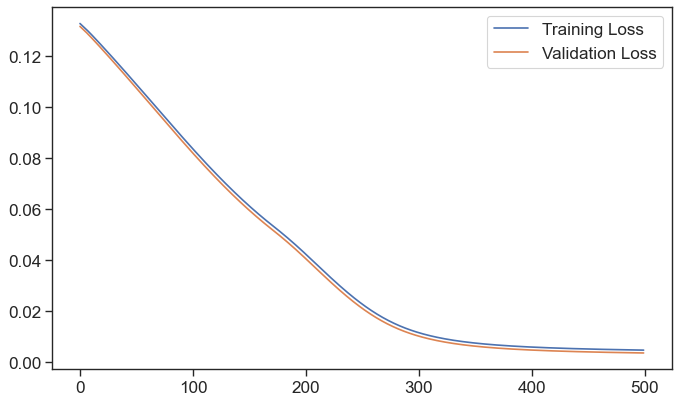

In [254]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

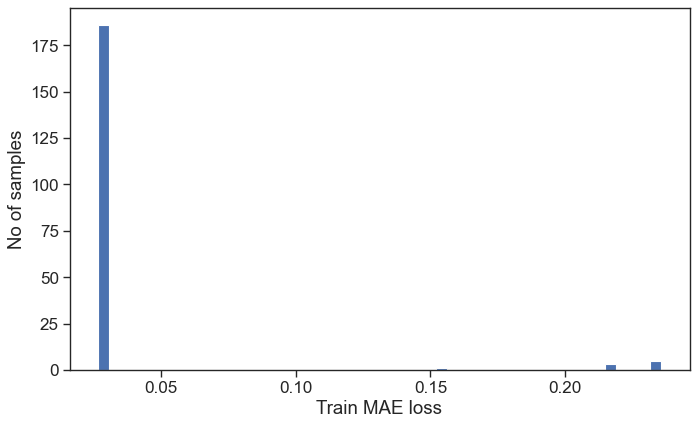

Reconstruction error threshold:  0.026612365245819093


In [255]:
train_pred = model.predict(train_data)
train_mae_loss = np.mean(np.abs(train_pred - train_data), axis=1)

train_mae_loss_df = train_mae_loss.to_frame()
train_mae_loss_df.columns = ['anomaly']
train_mae_loss_counts_df = train_mae_loss_df.groupby(['anomaly']).size().reset_index(name='counts')
threshold = train_mae_loss_counts_df[train_mae_loss_counts_df["counts"] > 10]['anomaly'].max()

plt.figure(figsize=(10, 6), dpi=80)
plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

print("Reconstruction error threshold: ", threshold)

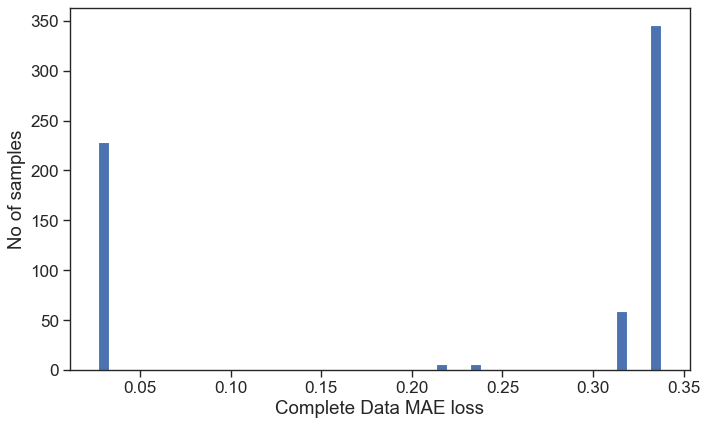

In [256]:
features_pred = model.predict(features)
features_mae_loss = np.mean(np.abs(features_pred - features), axis=1)

plt.figure(figsize=(10, 6), dpi=80)
plt.hist(features_mae_loss, bins=50)
plt.xlabel("Complete Data MAE loss")
plt.ylabel("No of samples")
plt.show()


In [257]:
indexmae = features_mae_loss[features_mae_loss>threshold].index

anomalies = data.loc[indexmae]

anomalies[anomalies['anomaly'] == 0]

,login_success,wrong_password,invalid_user,last_login_success,last_ip_login_failure,user,source_ip,source_port,anomaly
71,0,1,0,0,0,myazure1,182.66.55.189,36534,0
171,1,0,0,0,0,myazure1,223.191.32.164,51625,0
222,0,1,0,1,0,myazure1,223.191.32.164,18245,0
236,1,0,0,0,1,myazure1,223.191.32.164,3150,0
246,0,1,0,1,0,myazure1,223.191.32.164,37394,0
247,1,0,0,0,1,myazure1,223.191.32.164,51287,0
320,0,1,0,1,0,myazure1,223.191.32.164,46984,0
321,1,0,0,0,1,myazure1,223.191.32.164,3145,0
380,0,1,0,1,0,myazure1,223.191.32.164,46988,0
381,1,0,0,0,1,myazure1,223.191.32.164,40086,0


In [258]:
features_loss = features_mae_loss.to_frame()



features_loss.columns = ['anomaly']

features_loss.loc[features_loss.anomaly > threshold, "anomaly"] = 1
features_loss.loc[features_loss.anomaly <= threshold, "anomaly"] = 0

features_loss.shape

# print(features_loss.head())

(647, 1)

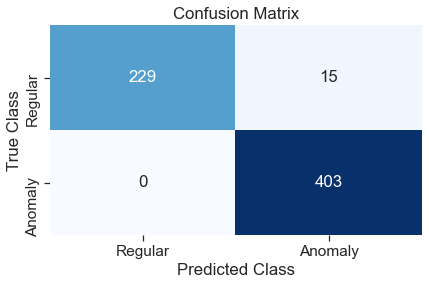

In [259]:
target.columns = ['anomaly']

matrix = confusion_matrix(target, features_loss)
confusion_df = pd.DataFrame(matrix, index = ['Regular', 'Anomaly'], columns = ['Regular', 'Anomaly'])

sns.heatmap(confusion_df, annot=True, fmt="d", cbar=None, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()